# Bulk plasmon Analysis
Analysis of bulk plasmons
- dielectric constants
- Drude model
- Lindhard model (in regard to traditional loss spectra)
- Lindhard+Drude (q-resolved loss spectra)

In [1]:
from __future__ import division
import numpy as np
from materials import Al, GB
from microscope import Microscope
from bulkMode import bulk_NR, bulk, bulk_q
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

Set dimmensions

In [2]:
q_perpendicular = np.linspace(1E-2,1.5,200,endpoint=True)*1E10#np.linspace(1E-2,200,200,endpoint=True)*1E6 #np.linspace(-1.5,1.5,200,endpoint=True)*1E10#
E = np.arange(10,20,0.03)#np.arange(1,20,0.03)

q_perpendicular = q_perpendicular[:,np.newaxis]
E = E[np.newaxis,:]

In [3]:
save_folder = 'C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/BulkPlasmon/'
fileDim = 'E10to20eV_q0to1.5A.jpg' #'E1E-3to20eV_q0to2um.jpg'#

Set materials

In [21]:
materials = [Al,GB(da=1E-11, dE=0.8), GB(da=1E-11, dE=1.5), GB(da=1E-11, dE=5.0)]#[Al,vac]#
for material in materials:
    print(material.name)
    print('n: ',material.n,'[e-/m^3]')
    material.set_Ep(type='Drude')
    print('Ep_0',material.E_p0)
    print('Emax',np.sqrt(material.E_p0**2/material.eps_inf - material.dE**2))
    print('kf',material.k_F)
    print('Ef',material.E_F)
    material.set_eps(E=E, q=q_perpendicular, type='Drude', multiple_eps=True)
    material.set_eps(E=E, q=q_perpendicular, type='Lindhard', multiple_eps=True)
    material.set_eps(E=E, q=q_perpendicular, type='Mermin', multiple_eps=True)
    print('')
#print(materials[1].eps.shape)
#materials[1].eps = np.ones_like(materials[1].eps)*(4+0j)
#print(materials[1].eps)

Al
n:  1.8117722802e+29 [e-/m^3]
Setting E_p
Ep_0 15.6127511844
Emax 15.3174786349
kf 17505514127.5
Ef 11.3882179509
Setting eps
Setting eps
Setting eps

GB
n:  1.68381104041e+29 [e-/m^3]
Setting E_p
Ep_0 15.0513103085
Emax 14.7586910146
kf 17083287544.6
Ef 10.8454838395
Setting eps
Setting eps
Setting eps

GB
n:  1.68381104041e+29 [e-/m^3]
Setting E_p
Ep_0 15.0513103085
Emax 14.7040457176
kf 17083287544.6
Ef 10.8454838395
Setting eps
Setting eps
Setting eps

GB
n:  1.68381104041e+29 [e-/m^3]
Setting E_p
Ep_0 15.0513103085
Emax 13.9089525294
kf 17083287544.6
Ef 10.8454838395
Setting eps
Setting eps
Setting eps



Set microscope

In [6]:
microscope = Microscope(keV=300)
microscope.print_parameters()

Microscope
  keV :  300
  gamma :  1.5870841487279843
  beta2 :  0.6029912379261115
  v :  232957531.351
  T :  154304.780267
  k0 :  3.19429261034e+12
  resolution :  0.05
  dispersion :  0.05
  collection_angle :  0.002



In [7]:
def calcAndPlot(bulkType='classic', material=None, eps=None, eps_tr=None, norm=LogNorm()):
    if bulkType=='classic':
        f_bulk = bulk(microscope, material=[material], q_y=q_perpendicular, E=E, eps=eps)
    elif bulkType == 'q-resolved':
        f_bulk = bulk_q(microscope, material=[material], q_perpendicular=q_perpendicular, E=E, eps_lon=eps, eps_tr=eps_tr)
    
    fig, ax = plt.subplots(2, figsize=(20,10), sharex=True)
    img0 = ax[0].pcolor(E, q_perpendicular/1E10, f_bulk,
                  cmap=plt.get_cmap('hot'), norm=norm)
    ax[0].set_ylabel(r'$q_{\perp} [\AA^-]$')
    ax[0].set_aspect('auto')

    ax[1].plot(E[0,:],f_bulk.sum(axis=0))
    ax[1].set_ylabel(r'I [a.u.]')
    ax[1].set_xlim(xmin=0)
    plt.autoscale(enable=True, axis='x', tight=True)
    ax[1].set_xlabel('E [eV]')
    #plt.tight_layout(pad=0.001)
    return f_bulk, fig

# Plotting

dielectric funciton

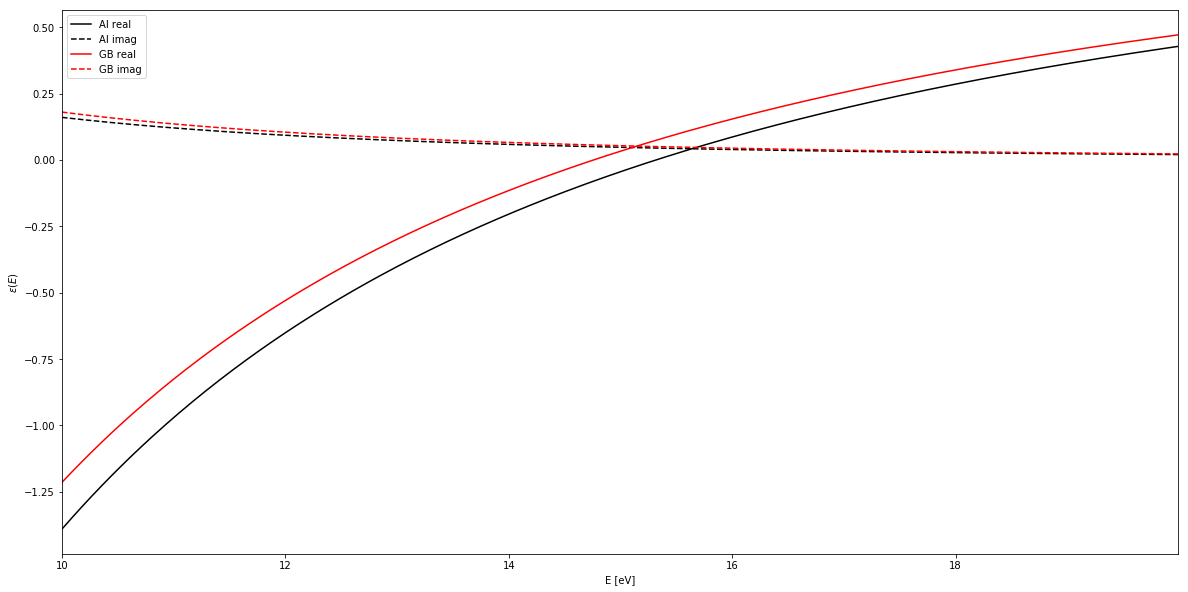

In [8]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,:],np.real(materials[0].eps[1,:]), '-k', label='Al real')
ax.plot(E[0,:],np.imag(materials[0].eps[1,:]), '--k', label='Al imag')
ax.plot(E[0,:],np.real(materials[1].eps[1,:]), '-r', label='GB real')
ax.plot(E[0,:],np.imag(materials[1].eps[1,:]), '--r', label='GB imag')
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon(E)$')
#ax.set_xlim(xmin=3)
plt.autoscale(enable=True, axis='x', tight=True)
ax.legend()
plt.show()

In [9]:
#fig.savefig(save_folder+'eps_'+fileDim,
#            transparent=True, bbox_inches='tight', dpi=800)

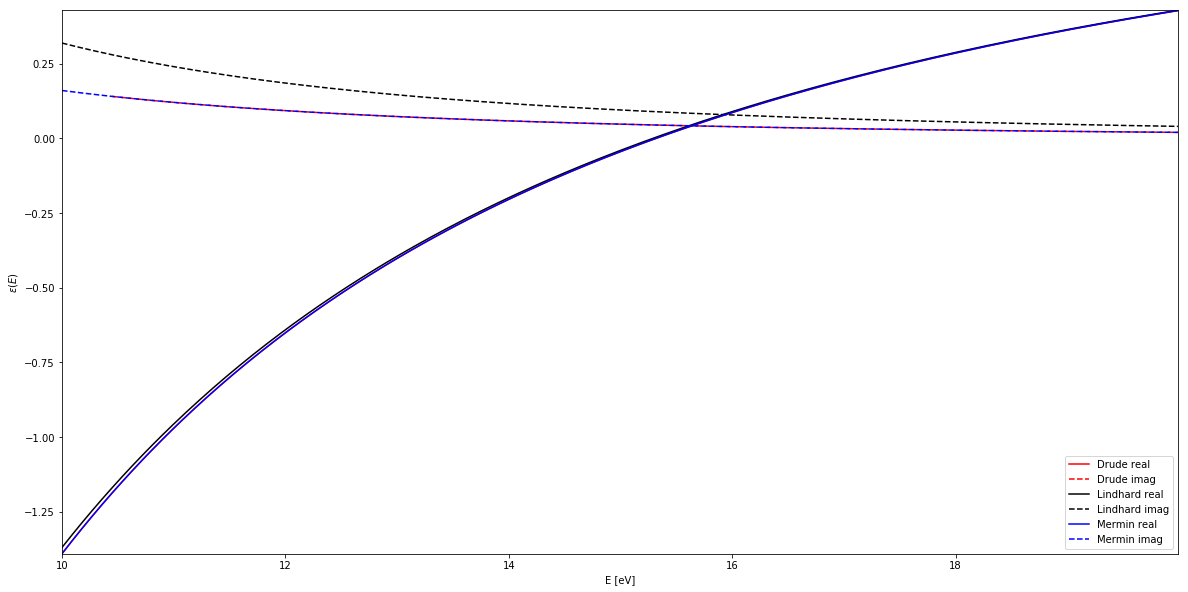

In [10]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,:],np.real(materials[0].eps_D[0,:]), '-r', label='Drude real')
ax.plot(E[0,15:],np.imag(materials[0].eps_D[0,15:]), '--r', label='Drude imag')
ax.plot(E[0,:],np.real(materials[0].eps_L[0,:]), '-k', label='Lindhard real')
ax.plot(E[0,:],np.imag(materials[0].eps_L[0,:]), '--k', label='Lindhard imag')
ax.plot(E[0,:],np.real(materials[0].eps_M[0,:]), '-b', label='Mermin real')
ax.plot(E[0,:],np.imag(materials[0].eps_M[0,:]), '--b', label='Mermin imag')
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon(E)$')
#ax.set_xlim(xmin=3)
ax.autoscale(enable=True, tight=True)
ax.legend()
plt.show()

In [11]:
#fig.savefig(save_folder+'epsCompare_'+fileDim,
#            transparent=True, bbox_inches='tight', dpi=800)

### Al Drude

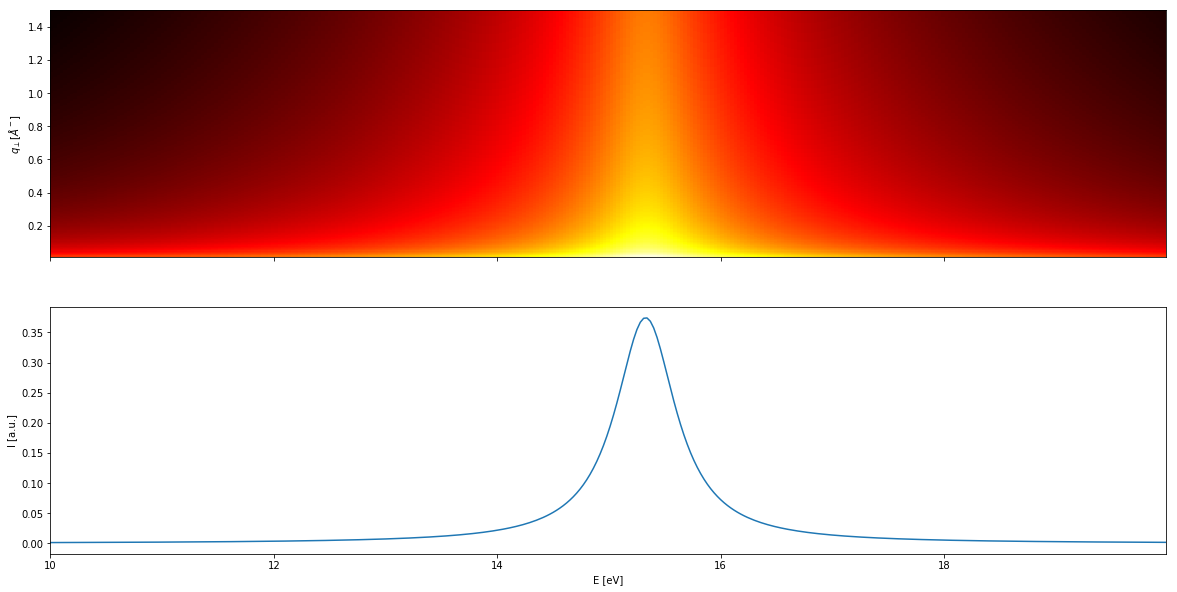

In [12]:
Al_bulk_D, fig = calcAndPlot(material=materials[0], eps='Drude')
plt.show()

In [ ]:
fig.savefig(save_folder+'Al_Drude_'+fileDim,
            transparent=True, bbox_inches='tight', dpi=800)

In [ ]:
Al_bulk_M, fig = calcAndPlot(material=materials[0], eps='Mermin')
plt.show()

In [ ]:
fig.savefig(save_folder+'Al_Mermin_'+fileDim,
            transparent=True, bbox_inches='tight', dpi=800)

In [ ]:
#Al_bulk_D, fig = calcAndPlot(material=materials[0], bulkType='q-resolved', eps='Lindhard', eps_tr='Drude')
#plt.show()

### GB Drude

In [ ]:
GB_bulk_D, fig = calcAndPlot(material=materials[1], eps='Drude')
plt.show()

In [ ]:
GB2_bulk_D, fig = calcAndPlot(material=materials[2], eps='Drude')
plt.show()

In [ ]:
GB3_bulk_D, fig = calcAndPlot(material=materials[3], eps='Drude')
plt.show()

### Drude compare

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
ax.plot(E[0,:],Al_bulk_D.sum(axis=0), label='Al')
ax.plot(E[0,:],GB_bulk_D.sum(axis=0), label=r'GB $(da=0.1 \AA, dE=0.8eV)$')
ax.plot(E[0,:],GB2_bulk_D.sum(axis=0), label=r'GB $(da=0.1 \AA, dE=1.5eV)$')
ax.plot(E[0,:],GB3_bulk_D.sum(axis=0), label=r'GB $(da=0.1 \AA, dE=5.0eV)$')
ax.set_xlabel('E [eV]')
ax.legend()
ax.autoscale(enable=True, tight=True)
plt.show()

In [ ]:
fig.savefig(save_folder+'BulkComparison_Mermin_'+fileDim,
            transparent=True, bbox_inches='tight', dpi=800)

### Al Lindhard

In [ ]:
Al_bulk_L, fig = calcAndPlot(material=materials[0], eps='Lindhard')
plt.show()

In [ ]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/BulkPlasmon/Al_Lindhard.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

### GB Lindhard

In [ ]:
GB_bulk, fig = calcAndPlot(material=materials[1], eps='Lindhard')
plt.show()

### GB2 Lindhard

In [ ]:
GB2_bulk, fig = calcAndPlot(material=materials[2], eps='Lindhard')
plt.show()

### Lindhard compare

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
ax.plot(E[0,:],Al_bulk_L.sum(axis=0), label='Al')
ax.plot(E[0,:],GB_bulk.sum(axis=0), label='GB')
ax.plot(E[0,:],GB2_bulk.sum(axis=0), label='GB2')
ax.set_xlabel('E [eV]')
ax.legend()
ax.autoscale(enable=True, tight=True)
plt.show()

In [ ]:
#fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/BulkPlasmon/Lindhard_comparison.jpg',
#            transparent=True, bbox_inches='tight', dpi=800)

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
ax.plot(E[0,:],Al_bulk_L.sum(axis=0)-GB_bulk.sum(axis=0), label='Al-GB')
ax.plot(E[0,:],Al_bulk.sum(axis=0), label='Al')
ax.plot(E[0,:],GB_bulk.sum(axis=0), label='GB')
ax.set_xlabel('E [eV]')
ax.legend()
plt.show()

In [ ]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/BulkPlasmon/Lindhard_comparison2.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
img0 = ax.imshow(Al_bulk-GB_bulk, aspect='auto', origin='lower', norm=SymLogNorm(1.0E-15), cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax.set_ylabel(r'$q_{y} [m^-]$')
#fig.colorbar(mappable=img0, ax=ax)
ax.set_xlabel('E [eV]')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
img0 = ax.imshow(GB_bulk-GB2_bulk, aspect='auto', origin='lower', norm=SymLogNorm(1.0E-15), cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax.set_ylabel(r'$q_{y} [m^-]$')
fig.colorbar(mappable=img0, ax=ax)
ax.set_xlabel('E [eV]')
plt.show()

### Lindhard+Drude in q-dispersed

In [ ]:
Al_bulk_q, fig = calcAndPlot(bulkType='q-resolved', material=materials[0], eps='Lindhard', eps_tr='Drude')
plt.show()

### Compared q-dispersed vs non

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
ax.plot(E[0,:],Al_bulk.sum(axis=0), label='Al')
ax.plot(E[0,:],Al_bulk_q.sum(axis=0), label='Al_q')
ax.set_xlabel('E [eV]')
ax.legend()
plt.show()

## Mermin

### Al Mermin

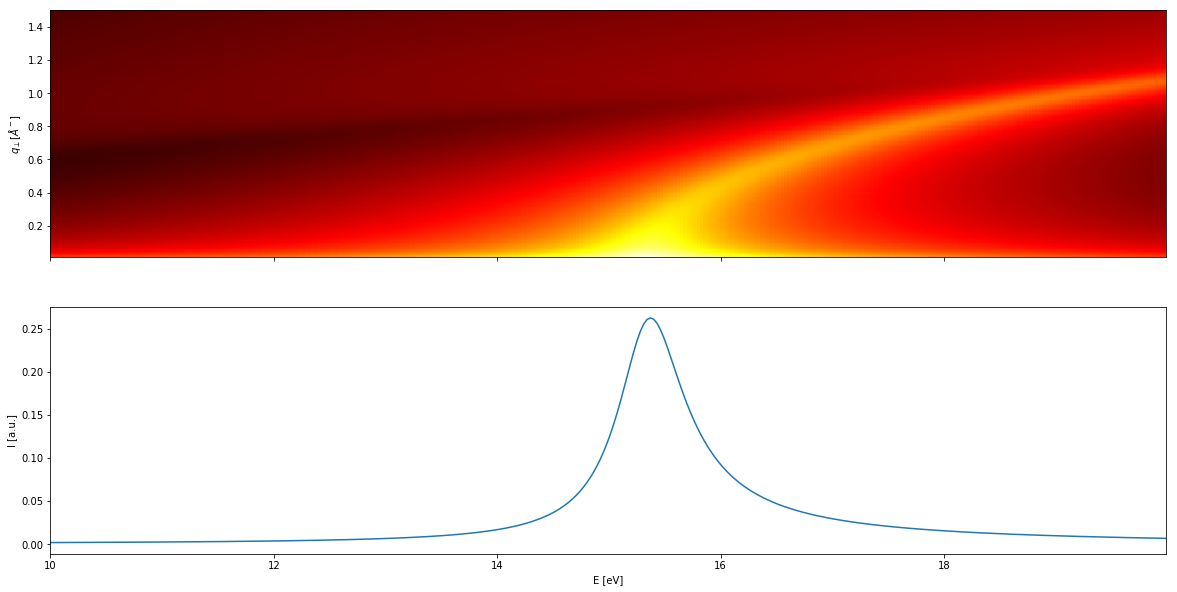

In [13]:
Al_bulk_M, fig = calcAndPlot(material=materials[0], eps='Mermin')
plt.show()

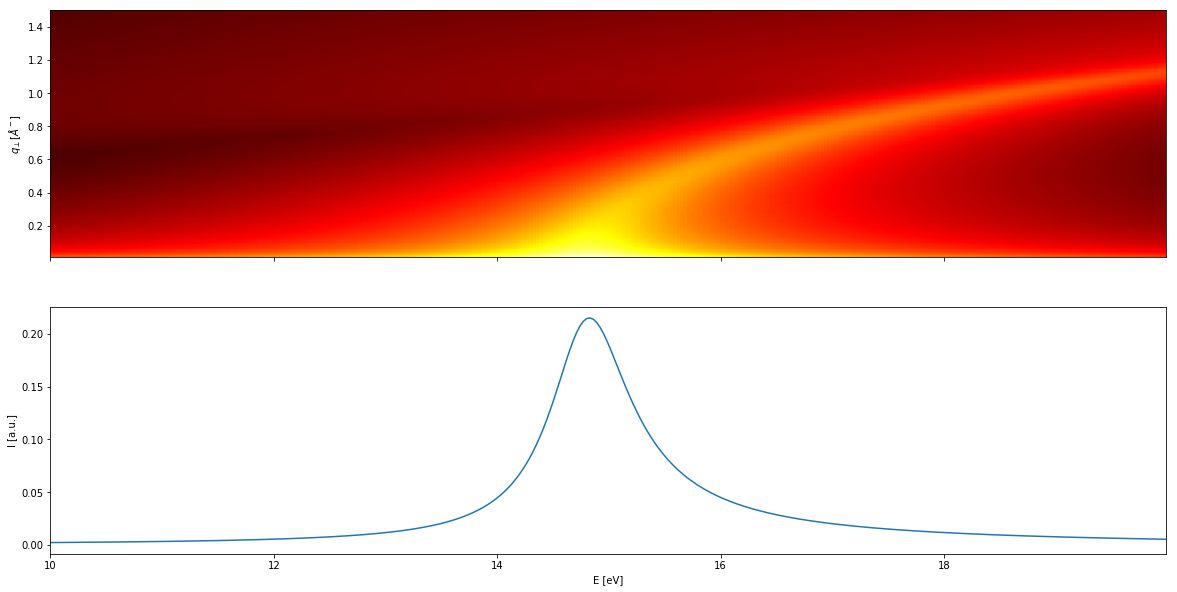

In [14]:
GB1_bulk_M, fig = calcAndPlot(material=materials[1], eps='Mermin')
plt.show()

In [15]:
fig.savefig(save_folder+'GB1_Mermin_'+fileDim,
            transparent=True, bbox_inches='tight', dpi=800)

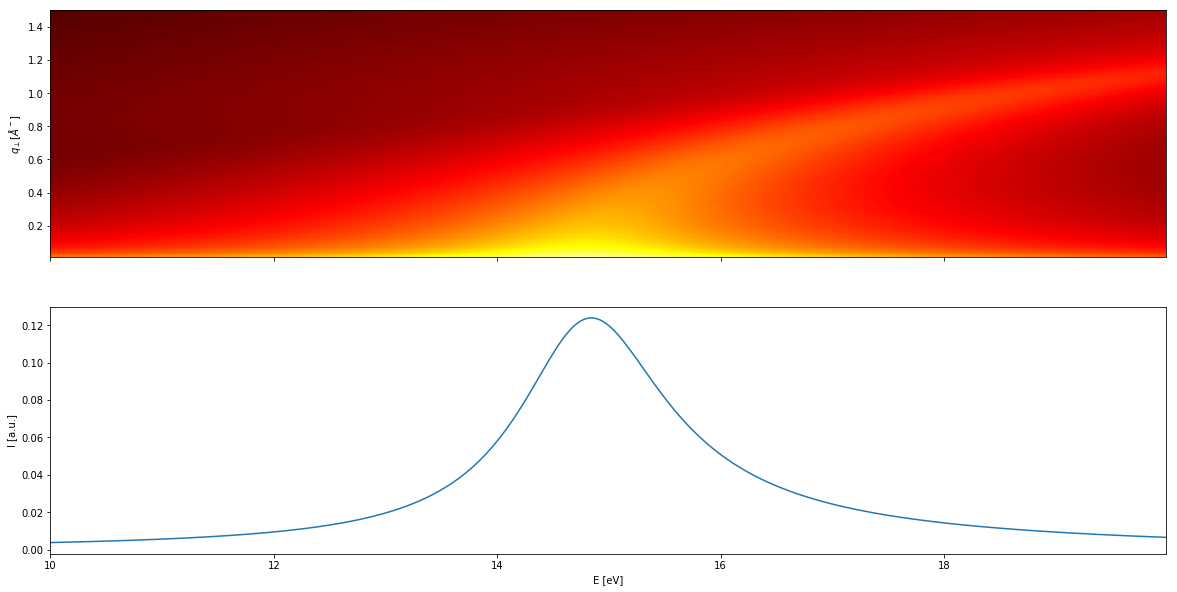

In [16]:
GB2_bulk_M, fig = calcAndPlot(material=materials[2], eps='Mermin')
plt.show()

In [17]:
fig.savefig(save_folder+'GB2_Mermin_'+fileDim,
            transparent=True, bbox_inches='tight', dpi=800)

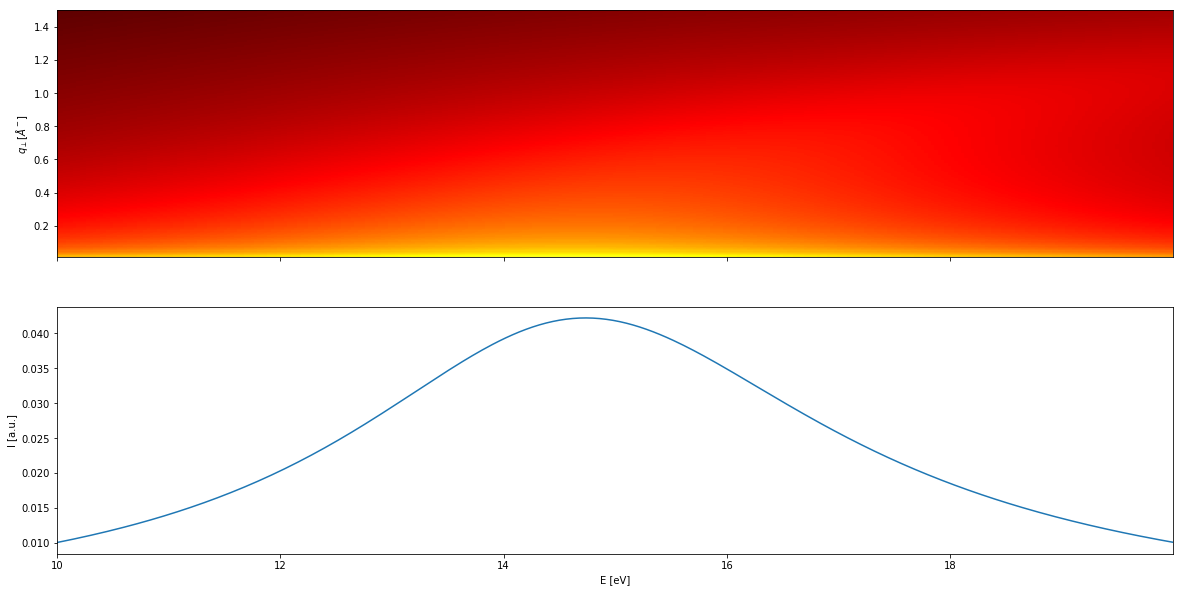

In [18]:
GB3_bulk_M, fig = calcAndPlot(material=materials[3], eps='Mermin')
plt.show()

In [19]:
fig.savefig(save_folder+'GB3_Mermin_'+fileDim,
            transparent=True, bbox_inches='tight', dpi=800)

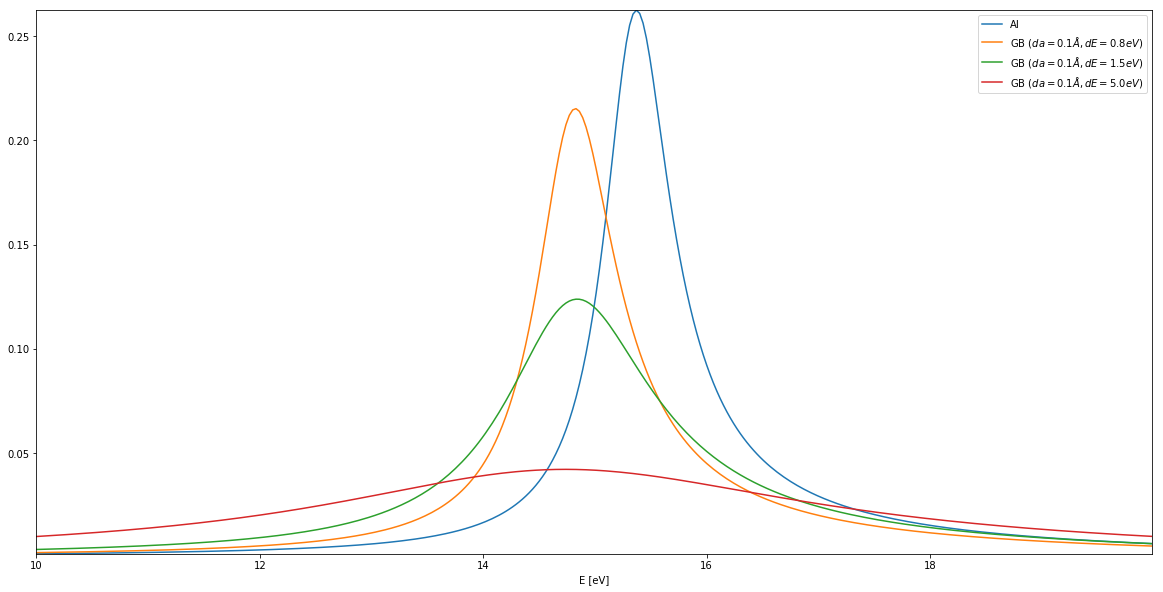

In [20]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
ax.plot(E[0,:],Al_bulk_M.sum(axis=0), label='Al')
ax.plot(E[0,:],GB1_bulk_M.sum(axis=0), label=r'GB $(da=0.1 \AA, dE=0.8eV)$')
ax.plot(E[0,:],GB2_bulk_M.sum(axis=0), label=r'GB $(da=0.1 \AA, dE=1.5eV)$')
ax.plot(E[0,:],GB3_bulk_M.sum(axis=0), label=r'GB $(da=0.1 \AA, dE=5.0eV)$')
ax.set_xlabel('E [eV]')
ax.legend()
ax.autoscale(enable=True, tight=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), sharex=True)
ax.plot(E[0,:],Al_bulk_D.sum(axis=0), label='Drude')
ax.plot(E[0,:],Al_bulk_L.sum(axis=0), label='Lindhard')
ax.plot(E[0,:],Al_bulk_M.sum(axis=0), label='Mermin')
ax.set_xlabel('E [eV]')
ax.legend()
plt.show()

In [ ]:
#fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/BulkPlasmon/eps_DrudeLindhardMermin.jpg',
#            transparent=True, bbox_inches='tight', dpi=800)